In [3]:
import pandas as pd

# لینک مستقیم گوگل درایو
url = "https://drive.google.com/uc?id=136sboLQTe1WXcqEFNSekzHeXxNOQi2iS"

# خواندن فایل CSV
df = pd.read_csv(url)

# نمایش 5 سطر اول
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print("تعداد نمونه‌ها:", df.shape[0])
print("تعداد ویژگی‌ها:", df.shape[1])
print("\nنوع داده‌ی هر ستون:\n", df.dtypes)
print("\nتعداد داده‌های گمشده در هر ستون:\n", df.isnull().sum())


تعداد نمونه‌ها: 545
تعداد ویژگی‌ها: 13

نوع داده‌ی هر ستون:
 price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

تعداد داده‌های گمشده در هر ستون:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [5]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("ویژگی‌های عددی:", list(numeric_features))
print("ویژگی‌های دسته‌ای:", list(categorical_features))


ویژگی‌های عددی: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
ویژگی‌های دسته‌ای: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


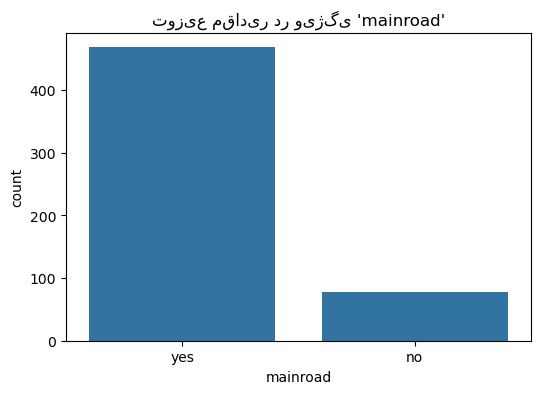

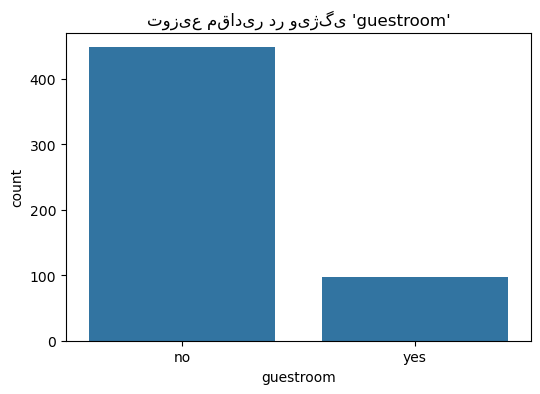

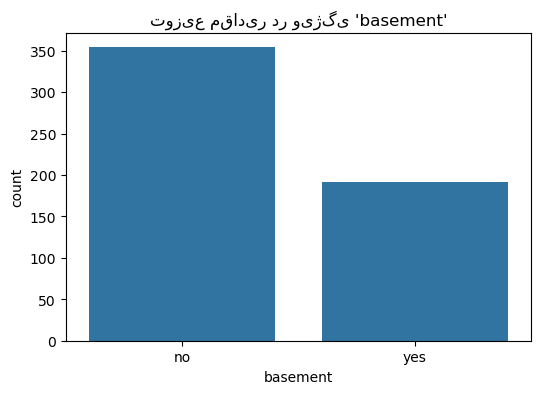

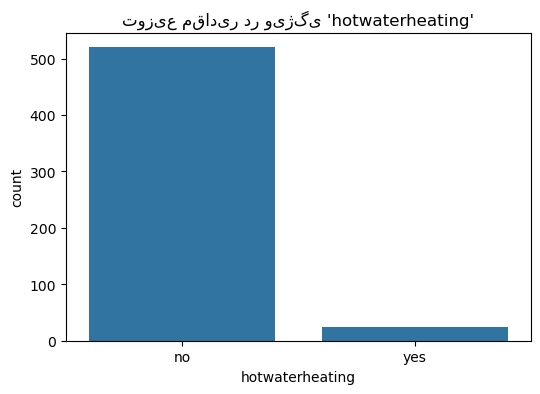

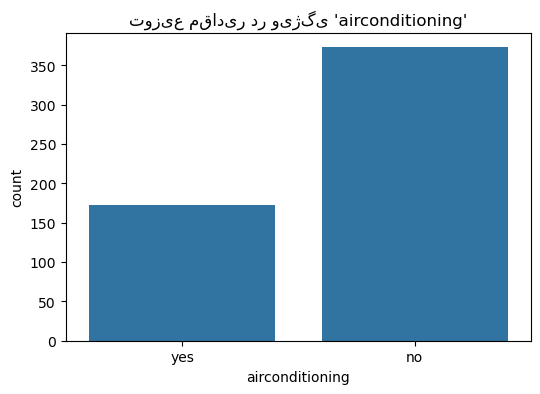

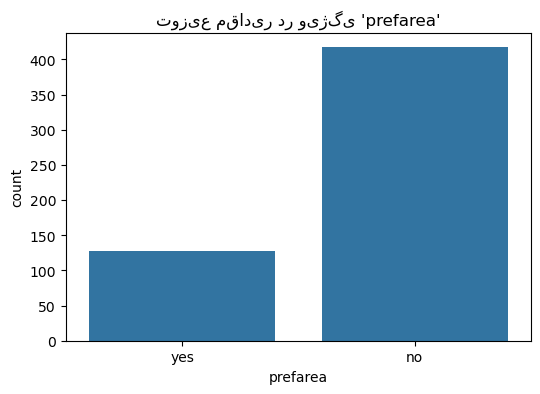

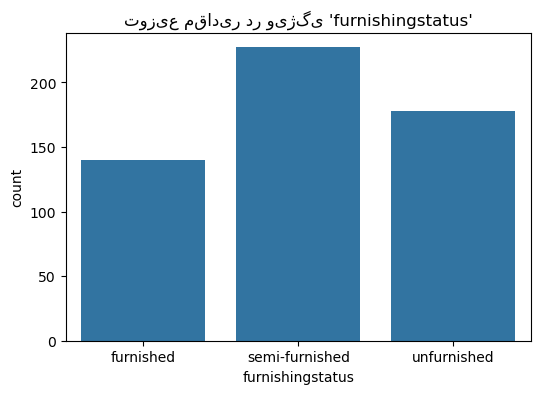

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"توزیع مقادیر در ویژگی '{col}'")
    plt.show()


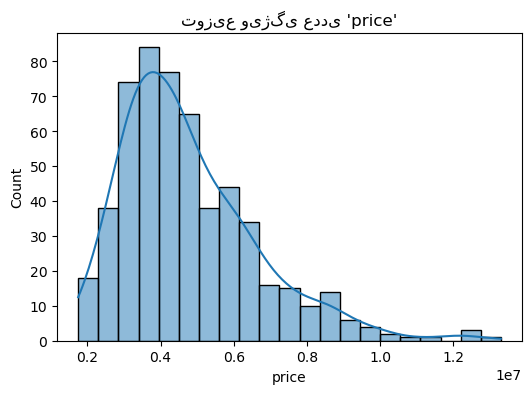

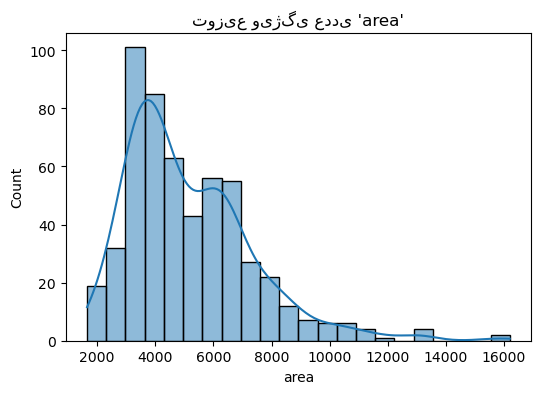

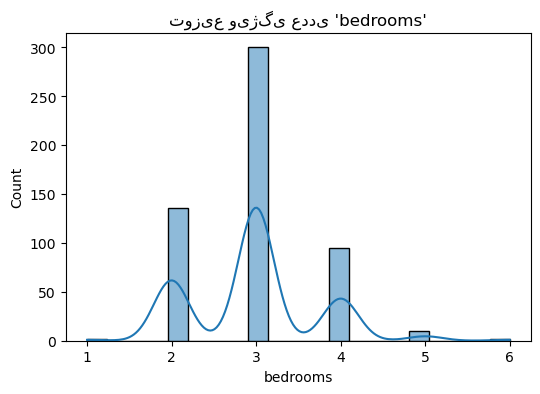

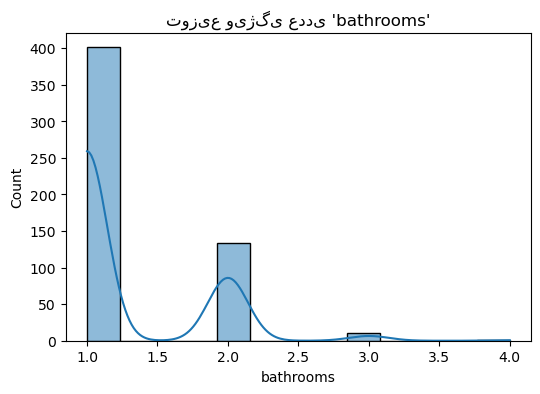

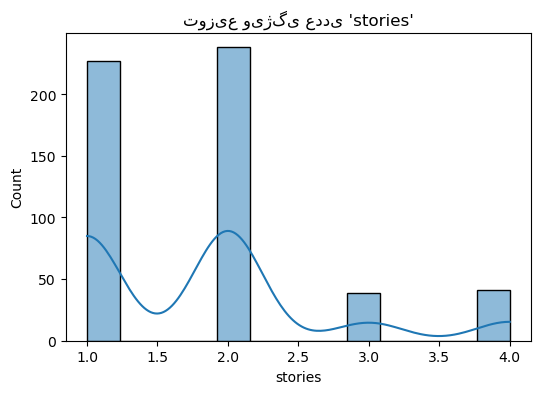

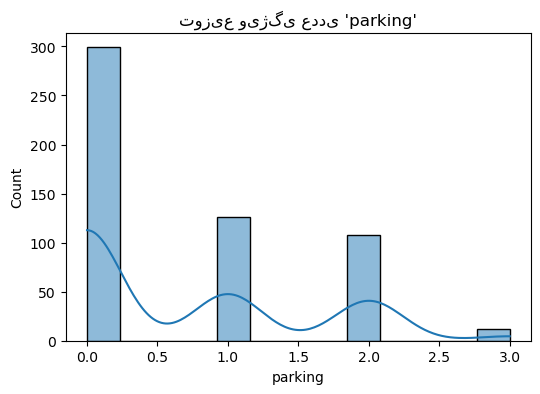

In [7]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"توزیع ویژگی عددی '{col}'")
    plt.show()


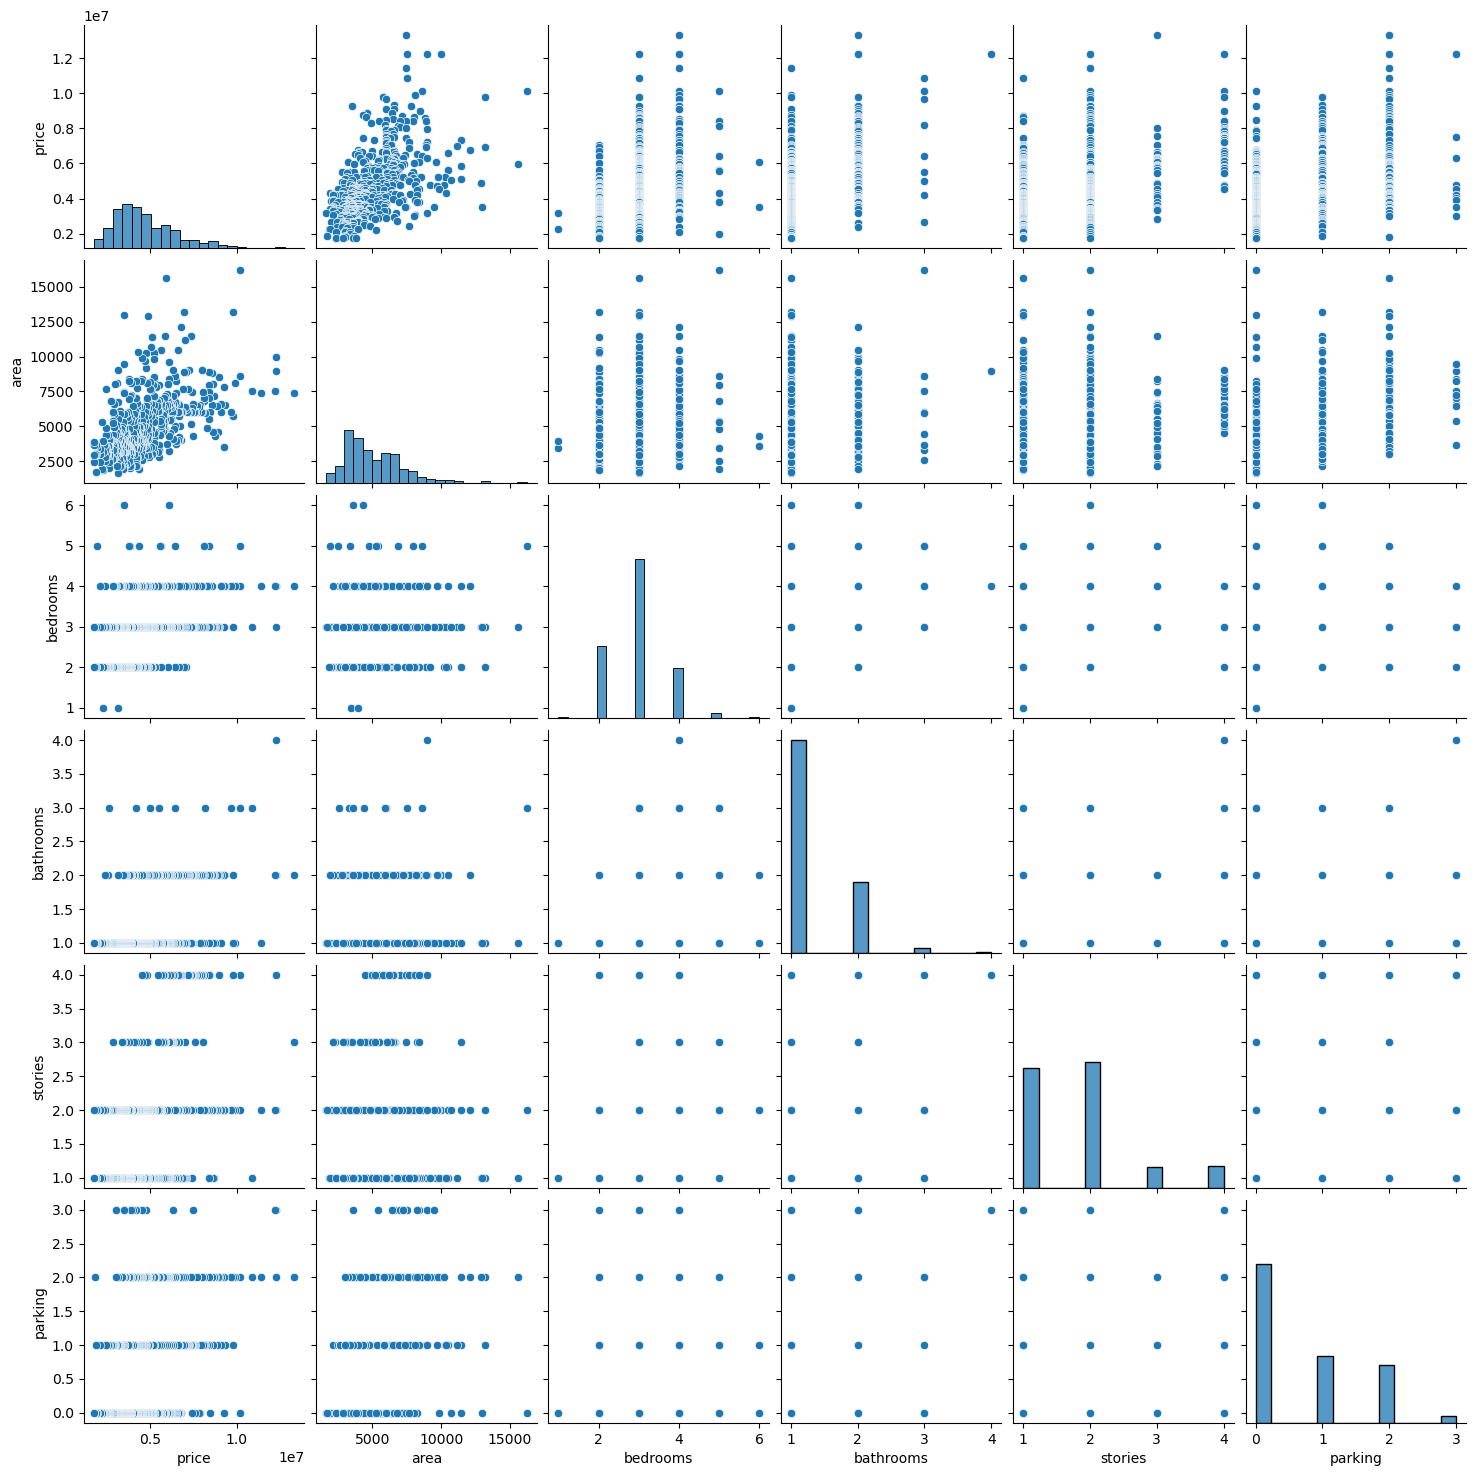

In [8]:
sns.pairplot(df[numeric_features])
plt.show()


In [9]:
print("تعداد کل سطرها قبل:", len(df))
dup_cnt = df.duplicated().sum()
print("تعداد سطرهای تکراری:", dup_cnt)

# حذف تکراری‌ها
df = df.drop_duplicates().reset_index(drop=True)
print("تعداد کل سطرها بعد:", len(df))


تعداد کل سطرها قبل: 545
تعداد سطرهای تکراری: 0
تعداد کل سطرها بعد: 545


In [10]:
import numpy as np

# شمارش مقادیر گمشده
na_counts = df.isnull().sum().sort_values(ascending=False)
print("مقادیر گمشده هر ستون:\n", na_counts)

# تفکیک نوع ستون‌ها
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# در صورت وجود Missing، این کد آن‌ها را پر می‌کند
for c in num_cols:
    if df[c].isnull().any():
        df[c].fillna(df[c].median(), inplace=True)

for c in cat_cols:
    if df[c].isnull().any():
        df[c].fillna(df[c].mode()[0], inplace=True)

print("\nپس از ایمپیوت:\n", df.isnull().sum().sum(), "مقدار گمشده باقی مانده است.")


مقادیر گمشده هر ستون:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

پس از ایمپیوت:
 0 مقدار گمشده باقی مانده است.


In [11]:
def remove_outliers_iqr(frame, cols):
    clean = frame.copy()
    for c in cols:
        Q1 = clean[c].quantile(0.25)
        Q3 = clean[c].quantile(0.75)
        IQR = Q3 - Q1
        low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        clean = clean[(clean[c] >= low) & (clean[c] <= high)]
    return clean

print("شکل داده قبل از حذف پرت‌ها:", df.shape)
df_no_out = remove_outliers_iqr(df, num_cols)  # معمولاً price هم شامل می‌شود
print("شکل داده بعد از حذف پرت‌ها:", df_no_out.shape)


شکل داده قبل از حذف پرت‌ها: (545, 13)
شکل داده بعد از حذف پرت‌ها: (365, 13)


In [12]:
from sklearn.model_selection import train_test_split

# فرض می‌کنیم هدف (target) ستون price است
target = "price"
X = df_no_out.drop(columns=[target])
y = df_no_out[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("X_train:", X_train.shape, " X_test:", X_test.shape)


X_train: (292, 12)  X_test: (73, 12)


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = X_train.select_dtypes(include=['int64','float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder='drop'
)

# تست: فقط ترنسفورم را فیت کنیم و شکل خروجی را ببینیم
preprocess.fit(X_train)
Xt_train = preprocess.transform(X_train)
Xt_test  = preprocess.transform(X_test)

print("شکل X_train پس از پیش‌پردازش:", Xt_train.shape)
print("شکل X_test  پس از پیش‌پردازش:", Xt_test.shape)


شکل X_train پس از پیش‌پردازش: (292, 20)
شکل X_test  پس از پیش‌پردازش: (73, 20)


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

target = "price"

# وان‌هات برای همهٔ ستون‌های دسته‌ای (drop_first برای جلوگیری از هم‌خطی کامل)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X.shape, X_train.shape


((545, 13), (436, 13))

بیشترین همبستگی مثبت با price:
 area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
bedrooms               0.366494
prefarea_yes           0.329777
mainroad_yes           0.296898
guestroom_yes          0.255517
basement_yes           0.187057
Name: price, dtype: float64

بیشترین همبستگی منفی با price:
 stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


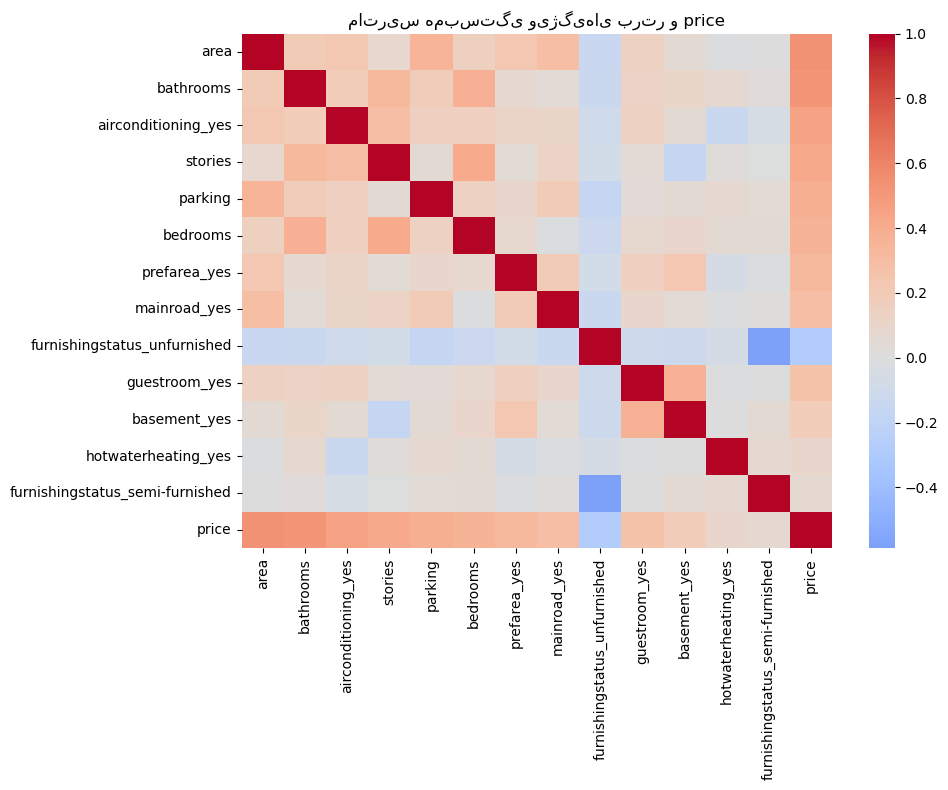

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ماتریس همبستگی
corr = X.join(y).corr(numeric_only=True)

# مرتب‌سازی همبستگی ویژگی‌ها با هدف (price)
corr_with_target = corr[target].drop(target).sort_values(ascending=False)
print("بیشترین همبستگی مثبت با price:\n", corr_with_target.head(10))
print("\nبیشترین همبستگی منفی با price:\n", corr_with_target.tail(10))

# نقشهٔ حرارتی (Heatmap) از همبستگی‌های بین ۲۰ ستونِ مهم‌تر (برای خوانایی)
top_cols = corr_with_target.abs().sort_values(ascending=False).head(20).index.tolist() + [target]
plt.figure(figsize=(10,8))
sns.heatmap(corr.loc[top_cols, top_cols], annot=False, cmap="coolwarm", center=0)
plt.title("ماتریس همبستگی ویژگی‌های برتر و price")
plt.tight_layout()
plt.show()


تعداد مؤلفه‌ها برای پوشش ≥95% واریانس: 12


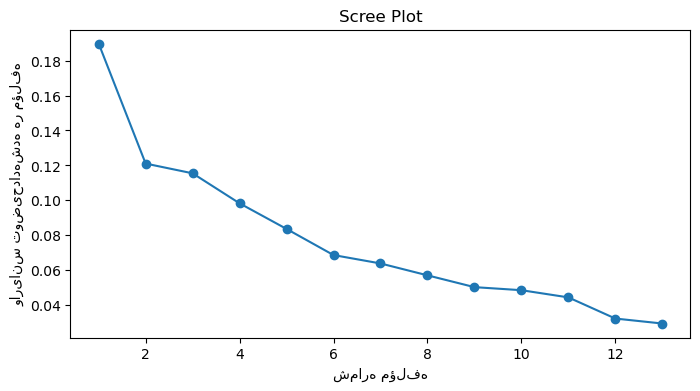

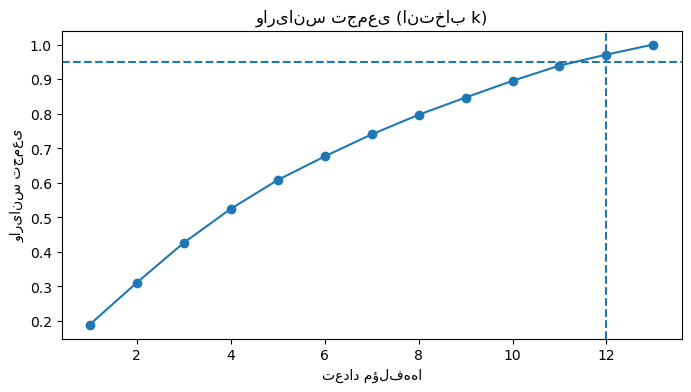

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# استانداردسازی (برای PCA ضروری است)
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

# اجرای PCA بدون تعیین k برای دیدن کل طیف
pca = PCA(n_components=None, random_state=42)
pca.fit(Xs)

evr = pca.explained_variance_ratio_
cum_evr = np.cumsum(evr)

# انتخاب k بر اساس پوشش 95٪ واریانس
k_95 = np.argmax(cum_evr >= 0.95) + 1
print("تعداد مؤلفه‌ها برای پوشش ≥95% واریانس:", k_95)

# نمودار اسکری (سقوط واریانس) و واریانس تجمعی
plt.figure(figsize=(8,4))
plt.plot(range(1, len(evr)+1), evr, marker="o")
plt.xlabel("شماره مؤلفه")
plt.ylabel("واریانس توضیح‌داده‌شده هر مؤلفه")
plt.title("Scree Plot")
plt.show()

plt.figure(figsize=(8,4))
plt.plot(range(1, len(cum_evr)+1), cum_evr, marker="o")
plt.axhline(0.95, linestyle="--")
plt.axvline(k_95, linestyle="--")
plt.xlabel("تعداد مؤلفه‌ها")
plt.ylabel("واریانس تجمعی")
plt.title("واریانس تجمعی (انتخاب k)")
plt.show()

# تبدیل داده‌ها به k_95 مؤلفه (در صورت نیاز برای مدل‌سازی بعدی)
pca_k = PCA(n_components=k_95, random_state=42)
X_pca_train = pca_k.fit_transform(Xs)
X_pca_test  = pca_k.transform(scaler.transform(X_test))


In [17]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ---------- آماده‌سازی ورودی برای VIF ----------
def prepare_for_vif(X: pd.DataFrame) -> pd.DataFrame:
    Xc = X.copy()

    # فقط ستون‌های عددی را نگه داریم
    Xc = Xc.select_dtypes(include=[np.number])

    # همه را به float64 تبدیل کنیم
    Xc = Xc.astype(np.float64)

    # Inf/-Inf را به NaN تبدیل و بعد حذف کنیم
    Xc.replace([np.inf, -np.inf], np.nan, inplace=True)
    Xc.dropna(axis=0, inplace=True)  # در صورت وجود NaN در ردیف‌ها

    # ستون‌های ثابت (واریانس صفر) باعث خطای VIF می‌شوند → حذف‌شان کن
    const_cols = [c for c in Xc.columns if Xc[c].nunique() <= 1]
    if const_cols:
        print("حذف ستون‌های ثابت (واریانس صفر):", const_cols)
        Xc.drop(columns=const_cols, inplace=True)

    return Xc

# ---------- محاسبه VIF برای همهٔ ستون‌ها ----------
def compute_vif_df(X: pd.DataFrame) -> pd.Series:
    Xprep = prepare_for_vif(X)
    if Xprep.shape[1] == 0:
        return pd.Series(dtype=float)

    X_const = add_constant(Xprep, has_constant="add")
    vifs = pd.Series(
        [variance_inflation_factor(X_const.values, i+1)  # i+1 به‌خاطر ستون constant
         for i in range(Xprep.shape[1])],
        index=Xprep.columns,
        name="VIF",
        dtype="float64"
    )
    return vifs

# ---------- حذف تدریجی براساس آستانه ----------
def drop_high_vif_iter(X: pd.DataFrame, threshold: float = 10.0, max_iter: int = 50):
    Xcur = X.copy()
    for _ in range(max_iter):
        vifs = compute_vif_df(Xcur)
        if vifs.empty:
            print("ورودی معتبری برای VIF باقی نمانده.")
            return Xcur, vifs
        max_col = vifs.idxmax()
        max_v = vifs.max()
        print(f"بیشترین VIF: {max_v:.2f} ← {max_col}")
        if max_v <= threshold:
            print("پایان: همه VIFها ≤ آستانه هستند.")
            # Xcur را به همان ستون‌هایی که در آخرین محاسبهٔ معتبر بودند محدود کنیم
            Xcur = prepare_for_vif(Xcur)[vifs.index]
            return Xcur, vifs.sort_values(ascending=False)
        # حذف بدترین ستون و تکرار
        Xcur = Xcur.drop(columns=[max_col])
    # اگر به max_iter رسیدیم
    return prepare_for_vif(Xcur), compute_vif_df(Xcur).sort_values(ascending=False)

# --- استفاده: فرض می‌کنیم X همان get_dummies(drop_first=True) از دادهٔ تمیز است ---
# X = pd.get_dummies(df.drop(columns=['price']), drop_first=True)
X_vif, vif_final = drop_high_vif_iter(X, threshold=10.0)

print("شکل اولیه:", X.shape, "→ بعد از کنترل VIF:", X_vif.shape)
print("10 ویژگی با VIF بالاتر:\n", vif_final.head(10))


بیشترین VIF: 1.32 ← bedrooms
پایان: همه VIFها ≤ آستانه هستند.
شکل اولیه: (545, 13) → بعد از کنترل VIF: (545, 5)
10 ویژگی با VIF بالاتر:
 bedrooms     1.316597
stories      1.255202
bathrooms    1.252775
area         1.170959
parking      1.164172
Name: VIF, dtype: float64


تعداد ویژگی‌های انتخاب‌شده: 13
ویژگی‌های منتخب:
 ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


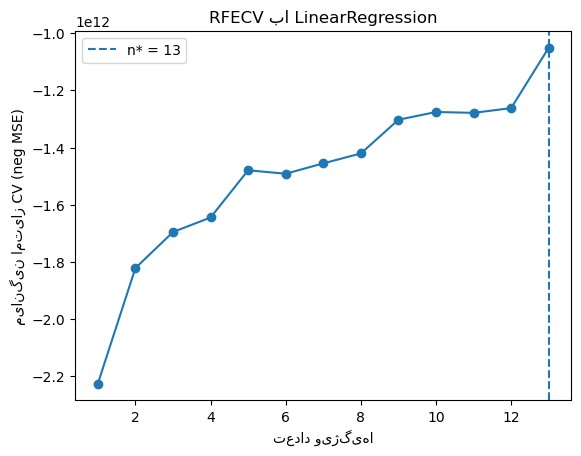

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

base_estimator = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

selector = RFECV(
    estimator=base_estimator,
    step=1,
    cv=cv,
    scoring="neg_mean_squared_error",  # یا "r2"
    n_jobs=-1
)
selector.fit(X_train, y_train)

print("تعداد ویژگی‌های انتخاب‌شده:", selector.n_features_)
selected_features = X_train.columns[selector.support_]
print("ویژگی‌های منتخب:\n", list(selected_features))

# ---- ترسیم عملکرد برحسب تعداد ویژگی‌ها (سازگار با نسخه‌های مختلف) ----
try:
    scores = selector.cv_results_["mean_test_score"]   # sklearn جدید
except AttributeError:
    scores = selector.grid_scores_                     # sklearn قدیمی

n_range = np.arange(1, len(scores) + 1)

plt.figure()
plt.plot(n_range, scores, marker="o")
plt.axvline(selector.n_features_, linestyle="--", label=f"n* = {selector.n_features_}")
plt.xlabel("تعداد ویژگی‌ها")
plt.ylabel("میانگین امتیاز CV (neg MSE)")
plt.title("RFECV با LinearRegression")
plt.legend()
plt.show()


In [19]:
from sklearn.feature_selection import RFE

k = 10  # تعداد ویژگی مورد نظر
rfe = RFE(estimator=LinearRegression(), n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)
selected_k = X_train.columns[rfe.support_]
print(f"{k} ویژگی منتخب با RFE:\n", list(selected_k))


10 ویژگی منتخب با RFE:
 ['bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_unfurnished']


In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [21]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name}")
    print("-"*40)
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    return pd.Series([mae, rmse, r2], index=["MAE", "RMSE", "R²"], name=name)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

res_lr = evaluate_model("Linear Regression", y_test, y_pred_lr)



Linear Regression
----------------------------------------
MAE : 970043.4039
RMSE: 1324506.9601
R²  : 0.6529


In [23]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

res_ridge = evaluate_model("Ridge Regression", y_test, y_pred_ridge)



Ridge Regression
----------------------------------------
MAE : 970245.6822
RMSE: 1325320.4441
R²  : 0.6525


In [24]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

res_lasso = evaluate_model("Lasso Regression", y_test, y_pred_lasso)



Lasso Regression
----------------------------------------
MAE : 970043.4082
RMSE: 1324506.9698
R²  : 0.6529


In [25]:
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

res_poly = evaluate_model("Polynomial Regression (deg=2)", y_test, y_pred_poly)



Polynomial Regression (deg=2)
----------------------------------------
MAE : 1042927.6355
RMSE: 1384371.4739
R²  : 0.6208


In [26]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # ساختار شبکه (تغییرپذیر)
    activation="relu",
    solver="adam",
    max_iter=2000,
    random_state=42
)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

res_mlp = evaluate_model("MLP Regressor", y_test, y_pred_mlp)



MLP Regressor
----------------------------------------
MAE : 1566994.0745
RMSE: 2007872.0467
R²  : 0.2024


In [27]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

res_elastic = evaluate_model("Elastic Net", y_test, y_pred_elastic)



Elastic Net
----------------------------------------
MAE : 977740.8716
RMSE: 1345989.3910
R²  : 0.6416


In [28]:
results = pd.concat([
    res_lr, res_ridge, res_lasso, res_poly, res_mlp, res_elastic
], axis=1).T

results = results.sort_values("RMSE")
results


,MAE,RMSE,R²
Linear Regression,9.700434e+05,1.324507e+06,0.652924
Lasso Regression,9.700434e+05,1.324507e+06,0.652924
Ridge Regression,9.702457e+05,1.325320e+06,0.652498
Elastic Net,9.777409e+05,1.345989e+06,0.641574
Polynomial Regression (deg=2),1.042928e+06,1.384371e+06,0.620841
MLP Regressor,1.566994e+06,2.007872e+06,0.202395


In [31]:
import pandas as pd
import numpy as np

target = "price"

# اگر قبلاً X_train و ... را ساخته‌ای، این سلول را می‌تواند رد کنی
if 'X_train' not in globals():
    from sklearn.model_selection import train_test_split
    # فرض: df دیتافریم تمیزشده‌ی شماست (بدون Missing/تکراری/پرت‌هایی که نمی‌خواهید)
    X = pd.get_dummies(df.drop(columns=[target]), drop_first=True)
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    print("X_train/X_test ساخته شد:", X_train.shape, X_test.shape)
else:
    # اگر قبلا ساخته بودی، همین را اطلاع بدهد
    print("از X_train/X_test موجود استفاده می‌شود:", X_train.shape, X_test.shape)


از X_train/X_test موجود استفاده می‌شود: (436, 13) (109, 13)


In [32]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_test_nn  = scaler_nn.transform(X_test)

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 16),  # لایه آخر پنهان = 16 نرون (Features)
    activation="relu",
    solver="adam",
    early_stopping=True,          # از داده‌ی اعتبارسنجی داخلی استفاده می‌کند
    validation_fraction=0.2,
    max_iter=5000,
    random_state=42
)
mlp.fit(X_train_nn, y_train)
print("Loss (train):", mlp.loss_)


Loss (train): 12570986934808.518


In [33]:
import numpy as np

def _act(a, name):
    if name == "relu":      return np.maximum(0, a)
    if name == "tanh":      return np.tanh(a)
    if name == "logistic":  return 1.0/(1.0 + np.exp(-a))
    if name == "identity":  return a
    raise ValueError("unknown activation")

def last_hidden_features(mlp_model, X_scaled):
    a = X_scaled
    # عبور تا قبل از لایه‌ی خروجی (coefs_[:-1])
    for W, b in zip(mlp_model.coefs_[:-1], mlp_model.intercepts_[:-1]):
        a = _act(a @ W + b, mlp_model.activation)
    return a  # شکل: (n_samples, size_of_last_hidden)

Z_train = last_hidden_features(mlp, X_train_nn)
Z_test  = last_hidden_features(mlp, X_test_nn)
print("شکل ویژگی‌های عمیق:", Z_train.shape, Z_test.shape)


شکل ویژگی‌های عمیق: (436, 16) (109, 16)


In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

def evaluate(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)**0.5
    r2   = r2_score(y_true, y_pred)
    return pd.Series([mae, rmse, r2], index=["MAE","RMSE","R2"], name=name)

results_deep = []

# Linear
lr = LinearRegression().fit(Z_train, y_train)
results_deep.append(evaluate("LR on DeepFeat", y_test, lr.predict(Z_test)))

# Ridge
ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=1.0))
ridge.fit(Z_train, y_train)
results_deep.append(evaluate("Ridge on DeepFeat", y_test, ridge.predict(Z_test)))

# Lasso
lasso = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.01, max_iter=10000))
lasso.fit(Z_train, y_train)
results_deep.append(evaluate("Lasso on DeepFeat", y_test, lasso.predict(Z_test)))

# Elastic Net (امتیازی)
elastic = make_pipeline(StandardScaler(with_mean=False), ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
elastic.fit(Z_train, y_train)
results_deep.append(evaluate("ElasticNet on DeepFeat", y_test, elastic.predict(Z_test)))

# Polynomial Regression روی Deep Features
poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                           StandardScaler(with_mean=False),
                           LinearRegression())
poly_model.fit(Z_train, y_train)
results_deep.append(evaluate("Poly(d2) on DeepFeat", y_test, poly_model.predict(Z_test)))

results_deep = pd.DataFrame(results_deep).sort_values("RMSE")
results_deep


,MAE,RMSE,R2
LR on DeepFeat,1.118103e+06,1.484887e+06,0.563783
Lasso on DeepFeat,1.118103e+06,1.484887e+06,0.563783
Ridge on DeepFeat,1.118817e+06,1.487290e+06,0.562370
ElasticNet on DeepFeat,1.135252e+06,1.529278e+06,0.537311
Poly(d2) on DeepFeat,1.169651e+06,1.631192e+06,0.473588


In [35]:
# اگر نتایج baseline ندارید، سریع حساب کنیم:
baseline_results = []

# برای مدل‌های حساس به مقیاس، از StandardScaler استفاده می‌کنیم
blr = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
blr.fit(X_train, y_train)
baseline_results.append(evaluate("LR on Raw", y_test, blr.predict(X_test)))

rr = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=1.0))
rr.fit(X_train, y_train)
baseline_results.append(evaluate("Ridge on Raw", y_test, rr.predict(X_test)))

la = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.01, max_iter=10000))
la.fit(X_train, y_train)
baseline_results.append(evaluate("Lasso on Raw", y_test, la.predict(X_test)))

en = make_pipeline(StandardScaler(with_mean=False), ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
en.fit(X_train, y_train)
baseline_results.append(evaluate("ElasticNet on Raw", y_test, en.predict(X_test)))

poly_raw = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                         StandardScaler(with_mean=False),
                         LinearRegression())
poly_raw.fit(X_train, y_train)
baseline_results.append(evaluate("Poly(d2) on Raw", y_test, poly_raw.predict(X_test)))

baseline_results = pd.DataFrame(baseline_results).sort_values("RMSE")
baseline_results


,MAE,RMSE,R2
LR on Raw,9.700434e+05,1.324507e+06,0.652924
Lasso on Raw,9.700434e+05,1.324507e+06,0.652924
Ridge on Raw,9.698579e+05,1.324703e+06,0.652821
ElasticNet on Raw,9.669299e+05,1.329765e+06,0.650163
Poly(d2) on Raw,1.042928e+06,1.384371e+06,0.620841


In [36]:
import matplotlib.pyplot as plt

final_table = pd.concat(
    [baseline_results.assign(Source="Raw Features"),
     results_deep.assign(Source="Deep Features")],
    axis=0
)

# نمایش مرتب‌شده
final_table_sorted = final_table.sort_values(["Source","RMSE"]).reset_index()
final_table_sorted.rename(columns={"index":"Model"}, inplace=True)
final_table_sorted


,Model,MAE,RMSE,R2,Source
0,LR on DeepFeat,1.118103e+06,1.484887e+06,0.563783,Deep Features
1,Lasso on DeepFeat,1.118103e+06,1.484887e+06,0.563783,Deep Features
2,Ridge on DeepFeat,1.118817e+06,1.487290e+06,0.562370,Deep Features
3,ElasticNet on DeepFeat,1.135252e+06,1.529278e+06,0.537311,Deep Features
4,Poly(d2) on DeepFeat,1.169651e+06,1.631192e+06,0.473588,Deep Features
5,LR on Raw,9.700434e+05,1.324507e+06,0.652924,Raw Features
6,Lasso on Raw,9.700434e+05,1.324507e+06,0.652924,Raw Features
7,Ridge on Raw,9.698579e+05,1.324703e+06,0.652821,Raw Features
8,ElasticNet on Raw,9.669299e+05,1.329765e+06,0.650163,Raw Features
9,Poly(d2) on Raw,1.042928e+06,1.384371e+06,0.620841,Raw Features


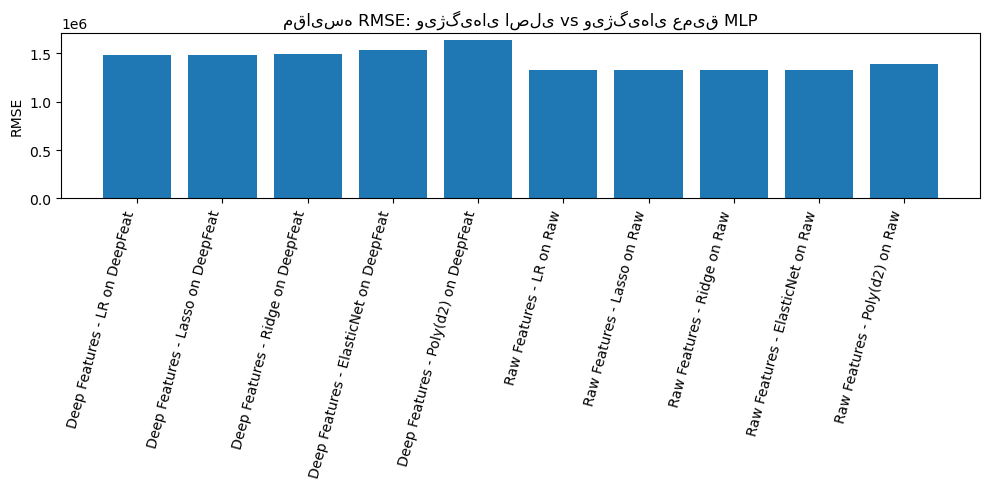

In [37]:
# نمودار ستون‌های RMSE (کوچک‌تر بهتر)
plt.figure(figsize=(10,5))
subset = final_table_sorted[["Model","Source","RMSE"]]
labels = subset["Source"] + " - " + subset["Model"]
plt.bar(labels, subset["RMSE"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("RMSE")
plt.title("مقایسه RMSE: ویژگی‌های اصلی vs ویژگی‌های عمیق MLP")
plt.tight_layout()
plt.show()


In [38]:
final_table_sorted.to_csv("results_comparison_mlps_deep_vs_raw.csv", index=False)
print("Saved:", "results_comparison_mlps_deep_vs_raw.csv")


Saved: results_comparison_mlps_deep_vs_raw.csv
